In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from glob import glob
help(glob)

Help on function glob in module glob:

glob(pathname, *, recursive=False)
    Return a list of paths matching a pathname pattern.
    
    The pattern may contain simple shell-style wildcards a la
    fnmatch. However, unlike fnmatch, filenames starting with a
    dot are special cases that are not matched by '*' and '?'
    patterns.
    
    If recursive is true, the pattern '**' will match any files and
    zero or more directories and subdirectories.



# merge, concat, join

In [3]:
files = glob("data/*tsv") # получим список с файлами
files

['data\\10_16-05_20-57_.tsv',
 'data\\20_17-05_20-00_.tsv',
 'data\\30_18-05_08-11_.tsv',
 'data\\40_19-05_04-00_.tsv']

In [6]:
df1 = pd.read_csv('data\\10_16-05_20-57_.tsv', sep='\t')
df1.head(3)

,id,Всего сообщений,Сообщений ученика,Сообщений учителя
0,162881860,14,9,5
1,163720554,19,10,9
2,542225346,8,2,6


In [7]:
df2 = pd.read_csv('data\\20_17-05_20-00_.tsv', sep='\t')
df2.head(3)

,id,Всего сообщений,Сообщений ученика,Сообщений учителя
0,304741397,14,6,8
1,222306609,30,16,14
2,406929921,9,5,4


## merge

![joins](https://www.dofactory.com/img/sql/sql-joins.png)

In [8]:
print(df1.shape)
print(df2.shape)

(4555, 4)
(4909, 4)


In [7]:
pd.merge(df1, df2) # пересечение по всем колонкам

,id,Всего сообщений,Сообщений ученика,Сообщений учителя
0,420405185,11,6,5
1,347431252,10,3,7
2,409439496,4,2,2
3,336133315,28,11,17
4,158278400,9,5,4
...,...,...,...,...
427,53318580,5,3,2
428,52048252,9,5,4
429,44351820,7,4,3
430,32888911,1,1,0


In [8]:
df1['id'].unique().size

4539

In [9]:
# как надо:
m = pd.merge(left=df1, right=df2, on='id')
m

,id,Всего сообщений_x,Сообщений ученика_x,Сообщений учителя_x,Всего сообщений_y,Сообщений ученика_y,Сообщений учителя_y
0,162881860,14,9,5,15,10,5
1,163720554,19,10,9,38,20,18
2,542225346,8,2,6,12,5,7
3,433941477,15,8,7,41,22,19
4,178097868,56,33,23,77,46,31
...,...,...,...,...,...,...,...
4555,52048252,9,5,4,9,5,4
4556,44351820,7,4,3,7,4,3
4557,32888911,1,1,0,1,1,0
4558,29237466,8,4,4,8,4,4


In [10]:
m['id'].unique().size

4534

In [11]:
pd.merge(left=df1, right=df2, on='id', suffixes=[' | файл1', ' | файл2']).head()

,id,Всего сообщений | файл1,Сообщений ученика | файл1,Сообщений учителя | файл1,Всего сообщений | файл2,Сообщений ученика | файл2,Сообщений учителя | файл2
0,162881860,14,9,5,15,10,5
1,163720554,19,10,9,38,20,18
2,542225346,8,2,6,12,5,7
3,433941477,15,8,7,41,22,19
4,178097868,56,33,23,77,46,31


In [12]:
pd.merge(left=df1, right=df2, on='id', suffixes=[' | файл1', 'файл2'], validate="one_to_one") # потому что есть дубли в обоих датафреймах

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

In [13]:
pd.merge(left=df1, right=df2, on='id', suffixes=[' | файл1', 'файл2'], validate="many_to_many").head() # проходит проверку

,id,Всего сообщений | файл1,Сообщений ученика | файл1,Сообщений учителя | файл1,Всего сообщенийфайл2,Сообщений ученикафайл2,Сообщений учителяфайл2
0,162881860,14,9,5,15,10,5
1,163720554,19,10,9,38,20,18
2,542225346,8,2,6,12,5,7
3,433941477,15,8,7,41,22,19
4,178097868,56,33,23,77,46,31


In [14]:
m = pd.merge(left=df1, right=df2, how='left', on='id', 
         suffixes=[' | файл1', 'файл2'], 
         validate="many_to_many") # проходит проверку

m[m['Сообщений учителяфайл2'].isna()]

,id,Всего сообщений | файл1,Сообщений ученика | файл1,Сообщений учителя | файл1,Всего сообщенийфайл2,Сообщений ученикафайл2,Сообщений учителяфайл2
117,97484555,5,4,1,NaN,NaN,NaN
303,138706633,4,2,2,NaN,NaN,NaN
1944,248434643,6,5,1,NaN,NaN,NaN
3497,143188892,3,3,0,NaN,NaN,NaN
3589,138585345,4,4,0,NaN,NaN,NaN


In [15]:
df1_no_dupl = df1.drop_duplicates()
df1_no_dupl.shape

(4539, 4)

In [16]:
df2_no_dupl = df2.drop_duplicates()
df2_no_dupl.shape

(4896, 4)

In [17]:
pd.merge(df1_no_dupl, df2_no_dupl, on='id', validate='one_to_one')

,id,Всего сообщений_x,Сообщений ученика_x,Сообщений учителя_x,Всего сообщений_y,Сообщений ученика_y,Сообщений учителя_y
0,162881860,14,9,5,15,10,5
1,163720554,19,10,9,38,20,18
2,542225346,8,2,6,12,5,7
3,433941477,15,8,7,41,22,19
4,178097868,56,33,23,77,46,31
...,...,...,...,...,...,...,...
4529,52048252,9,5,4,9,5,4
4530,44351820,7,4,3,7,4,3
4531,32888911,1,1,0,1,1,0
4532,29237466,8,4,4,8,4,4


## join

In [18]:
# получится фигня, потому что join соединяет по индексам правого датафрейма (для левого можно указать столбец)
df1.join(df2, lsuffix='_left', rsuffix='_right')  # важно указать суффиксы

,id_left,Всего сообщений_left,Сообщений ученика_left,Сообщений учителя_left,id_right,Всего сообщений_right,Сообщений ученика_right,Сообщений учителя_right
0,162881860,14,9,5,304741397,14,6,8
1,163720554,19,10,9,222306609,30,16,14
2,542225346,8,2,6,406929921,9,5,4
3,433941477,15,8,7,439552406,34,16,18
4,178097868,56,33,23,173017583,10,9,1
...,...,...,...,...,...,...,...,...
4550,52048252,9,5,4,439550436,6,3,3
4551,44351820,7,4,3,269693861,7,3,4
4552,32888911,1,1,0,266473129,11,4,7
4553,29237466,8,4,4,124968658,6,3,3


In [19]:
df1.join(df2, on='id', lsuffix='_left', rsuffix='_right').head() # все еще не работает

,id_left,Всего сообщений_left,Сообщений ученика_left,Сообщений учителя_left,id_right,Всего сообщений_right,Сообщений ученика_right,Сообщений учителя_right
0,162881860,14,9,5,NaN,NaN,NaN,NaN
1,163720554,19,10,9,NaN,NaN,NaN,NaN
2,542225346,8,2,6,NaN,NaN,NaN,NaN
3,433941477,15,8,7,NaN,NaN,NaN,NaN
4,178097868,56,33,23,NaN,NaN,NaN,NaN


In [20]:
df2_indexed = df2.set_index('id') # сохраним индекс 
df2_indexed.head()

,Всего сообщений,Сообщений ученика,Сообщений учителя
id,,,
304741397,14,6,8
222306609,30,16,14
406929921,9,5,4
439552406,34,16,18
173017583,10,9,1


In [21]:
df1.join(df2_indexed, on='id', how='inner', lsuffix='_left', rsuffix='_right') # теперь работает

,id,Всего сообщений_left,Сообщений ученика_left,Сообщений учителя_left,Всего сообщений_right,Сообщений ученика_right,Сообщений учителя_right
0,162881860,14,9,5,15,10,5
1,163720554,19,10,9,38,20,18
2,542225346,8,2,6,12,5,7
3,433941477,15,8,7,41,22,19
4,178097868,56,33,23,77,46,31
...,...,...,...,...,...,...,...
4550,52048252,9,5,4,9,5,4
4551,44351820,7,4,3,7,4,3
4552,32888911,1,1,0,1,1,0
4553,29237466,8,4,4,8,4,4


In [22]:
# или так

df1_indexed = df1.set_index('id')
df1_indexed.join(df2_indexed, how='inner', lsuffix='_left', rsuffix='_right') 

,Всего сообщений_left,Сообщений ученика_left,Сообщений учителя_left,Всего сообщений_right,Сообщений ученика_right,Сообщений учителя_right
id,,,,,,
1526163,8,6,2,9,7,2
1658327,14,9,5,15,10,5
3424983,4,4,0,5,5,0
3602010,9,5,4,9,5,4
5125376,4,2,2,5,3,2
...,...,...,...,...,...,...
544735677,16,8,8,17,9,8
544763802,6,4,2,7,5,2
544776546,12,7,5,16,9,7


## concat
еще есть append, но его удалят

In [23]:
pd.concat([df1, df2], axis=0) # вдоль строк, то есть приклеить снизу

,id,Всего сообщений,Сообщений ученика,Сообщений учителя
0,162881860,14,9,5
1,163720554,19,10,9
2,542225346,8,2,6
3,433941477,15,8,7
4,178097868,56,33,23
...,...,...,...,...
4904,53318580,5,3,2
4905,52048252,9,5,4
4906,44351820,7,4,3
4907,32888911,1,1,0


In [24]:
pd.concat([df1, df2], axis=1) # вдоль столбцов, то есть приклеить справа

,id,Всего сообщений,Сообщений ученика,Сообщений учителя,id,Всего сообщений,Сообщений ученика,Сообщений учителя
0,162881860.0,14.0,9.0,5.0,304741397,14,6,8
1,163720554.0,19.0,10.0,9.0,222306609,30,16,14
2,542225346.0,8.0,2.0,6.0,406929921,9,5,4
3,433941477.0,15.0,8.0,7.0,439552406,34,16,18
4,178097868.0,56.0,33.0,23.0,173017583,10,9,1
...,...,...,...,...,...,...,...,...
4904,NaN,NaN,NaN,NaN,53318580,5,3,2
4905,NaN,NaN,NaN,NaN,52048252,9,5,4
4906,NaN,NaN,NaN,NaN,44351820,7,4,3
4907,NaN,NaN,NaN,NaN,32888911,1,1,0


## практика

In [25]:
# посмотрим на файлы в папке
files = glob("data/*csv")
files

['data\\Cars_Country.csv', 'data\\Cars_Multi.csv', 'data\\Cars_Price.csv']

In [26]:
# прочитаем данные в датафреймы
country = pd.read_csv('data\\Cars_Country.csv')
country

,origin,country
0,1,USA
1,2,Europe
2,3,Japan


In [27]:
# прочитаем данные в датафреймы
multi = pd.read_csv('data\\Cars_Multi.csv')
multi.head()

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
price = pd.read_csv('data\\Cars_Price.csv')
price.head()

,ID,price
0,1,25561.59078
1,2,24221.42273
2,3,27240.84373
3,4,33684.96888
4,5,20000.00000


In [29]:
# соедините три датафрейма в один 
# за один шаг -- никак. сначала надо соединить два, потом еще два.
tmp_df = pd.merge(multi, price, on='ID', how='left', validate='one_to_one')
tmp_df.head()

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,price
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25561.59078
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,24221.42273
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,27240.84373
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,33684.96888
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,20000.00000


In [30]:
pd.merge(left=tmp_df, right=country, on='origin')

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,price,country
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25561.59078,USA
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,24221.42273,USA
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,27240.84373,USA
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,33684.96888,USA
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,20000.00000,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
393,355,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,30000.00000,Europe
394,360,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel,20000.00000,Europe
395,361,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel,40000.00000,Europe
396,376,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l,33472.79144,Europe


# Pivoting

Широкие и длинные данные:

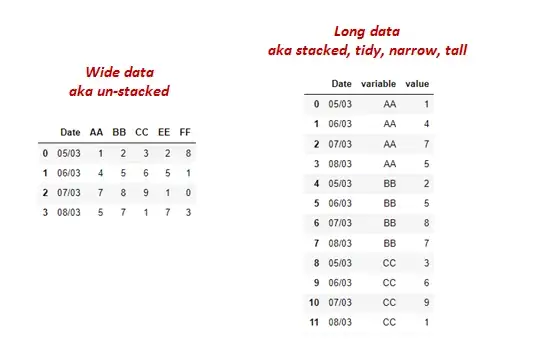

## WIDE to LONG

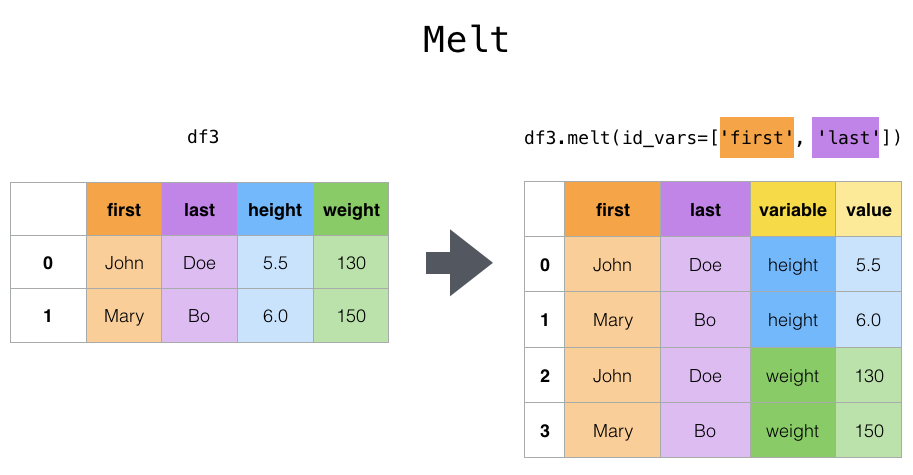

In [31]:
example = cheese = pd.DataFrame({'first': ['John', 'Mary'],
                       'last': ['Doe', 'Bo'],
                       'height': [5.5, 6.0],
                       'weight': [130, 150]})
example

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


### stack

In [32]:
st = example.stack() # получаем multiIndex объект
st

0  first     John
   last       Doe
   height     5.5
   weight     130
1  first     Mary
   last        Bo
   height     6.0
   weight     150
dtype: object

In [33]:
st.index

MultiIndex([(0,  'first'),
            (0,   'last'),
            (0, 'height'),
            (0, 'weight'),
            (1,  'first'),
            (1,   'last'),
            (1, 'height'),
            (1, 'weight')],
           )

In [34]:
st[(0, 'first')] # неприятно, непонятно

'John'

In [35]:
st.unstack() # обратно

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


### melt

In [36]:
# понятный вариант
example.melt(id_vars=['first', 'last'], 
             value_vars=['height', 'weight'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


### wide_to_long

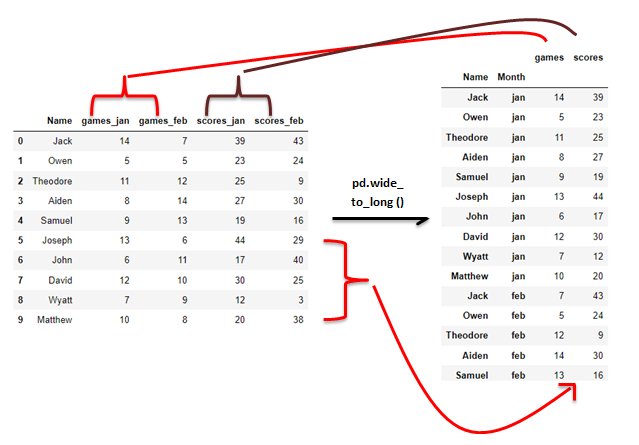

## LONG to WIDE

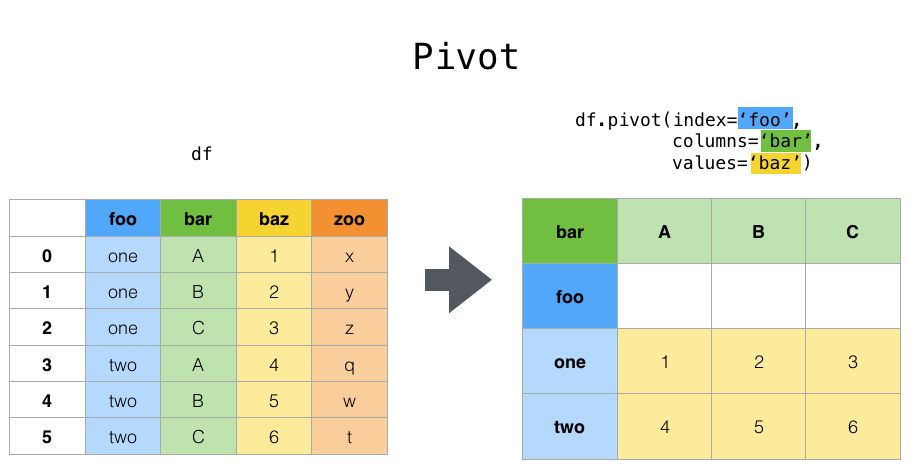



    pivot() provides general purpose pivoting with various data types (strings, numerics, etc.)
    pivot() just reshapes or substitute value in each cell
    pivot() has only three arguments

        index - what goes on index,
        column - what goes on column name,
        values - what goes on cell value

    pivot() can't aggregate data



In [37]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df.head()

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w


In [38]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [39]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo']) # опять multiindex...

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [40]:
tmp_pivot = df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])
tmp_pivot.columns

MultiIndex([('baz', 'A'),
            ('baz', 'B'),
            ('baz', 'C'),
            ('zoo', 'A'),
            ('zoo', 'B'),
            ('zoo', 'C')],
           names=[None, 'bar'])

In [41]:
tmp_pivot.columns = list(range(1, 7))
tmp_pivot

,1,2,3,4,5,6
foo,,,,,,
one,1,2,3,x,y,z
two,4,5,6,q,w,t


In [42]:
tmp_pivot = df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])
tmp_pivot.T.reset_index().T


,0,1,2,3,4,5
foo,,,,,,
level_0,baz,baz,baz,zoo,zoo,zoo
bar,A,B,C,A,B,C
one,1,2,3,x,y,z
two,4,5,6,q,w,t


### pivot_table

    pivot_table() can do aggregation of numeric data.
    pivot_table() can be used to create spreadsheet-style pivot tables.
    pivot_table() has arguments like aggfunc, fill_value, dropna ...



In [44]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [45]:
pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'], columns=['C'], aggfunc=pd.Series.count)

D           E      
C       large small large small
A   B                          
bar one   1.0   1.0   1.0   1.0
    two   1.0   1.0   1.0   1.0
foo one   2.0   1.0   2.0   1.0
    two   NaN   2.0   NaN   2.0

## практика

In [46]:
import seaborn as sns

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [47]:
# получите следующую таблицу (широкий вид)


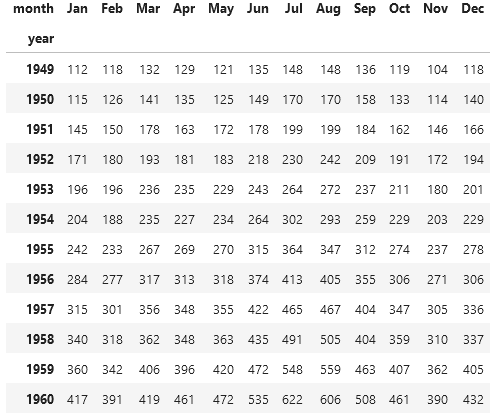

In [48]:
# ваш код

In [49]:
# арггрегируйте полученную таблицу обратно в длинный вид при помощи melt


## практика еще раз

In [50]:
pop = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')

In [51]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [52]:
# получите таблицу следующего вида

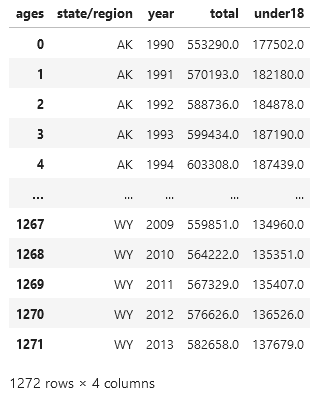

In [53]:
#######

In [54]:
area = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
abbrev = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')

In [55]:
area.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [56]:
abbrev.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [57]:
# соедините информацию в один датафрейма

In [58]:
# постройте распределение area (hist)

In [59]:
# создайте новый столбец с первой буквой кода штата

In [60]:
# посчитайте число вхождений каждой категории в столбце, созданном в предыдущем пункте

In [61]:
# постройте распределение для каждой категории на одном графике 